In [ ]:
#INSTALANDO AS BIBLIOTECAS NECESSÁRIAS

!pip install geopandas
!pip install mapclassify
!pip install geoplot
!pip install descartes
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify
import geoplot
import geopandas as gpd
import matplotlib.colors as colors
import seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#CARREGANDO DE MINAS POR MUNICIPIOS

br = '/content/drive/MyDrive/Minas Gerais/31MUE250GC_SIR.shp'
map = gpd.read_file(br)
map

,NM_MUNICIP,CD_GEOCMU,geometry
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.43840 -18.16570, -47.43588 -18.1..."
1,ABAETÉ,3100203,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8..."
2,ABRE CAMPO,3100302,"POLYGON ((-42.38220 -20.12176, -42.38205 -20.1..."
3,ACAIACA,3100401,"POLYGON ((-43.13156 -20.34249, -43.13143 -20.3..."
4,AÇUCENA,3100500,"POLYGON ((-42.37085 -18.92507, -42.37036 -18.9..."
...,...,...,...
848,VIRGINÓPOLIS,3171808,"POLYGON ((-42.70275 -18.66162, -42.70220 -18.6..."
849,VIRGOLÂNDIA,3171907,"POLYGON ((-42.32180 -18.35685, -42.32146 -18.3..."
850,VISCONDE DO RIO BRANCO,3172004,"POLYGON ((-42.90610 -20.93325, -42.90587 -20.9..."
851,VOLTA GRANDE,3172103,"POLYGON ((-42.57184 -21.68033, -42.57160 -21.6..."


In [ ]:
#CARREGANDO O DATAFRAME COM OS VALORES QUE QUEREMOS PLOTAR
tabela = pd.read_csv('/content/Municipio.txt')
tabela

,Munip,Qtd,Ident
0,BOM JESUS DO GALHO,150,1
1,CARATINGA,9556,2
2,CÓRREGO NOVO,10,3
3,Dom Cavati,68,4
4,Entre Folhas,74,5
5,Imbe de Minas,82,6
6,Inhapim,425,7
7,Piedade de Caratinga,118,8
8,Santa Barbara do Leste,156,9
9,Santa Rita de Minas,184,10


In [ ]:
#ACHANDO VALORES COM ESCRITA DIFERENTE PARA PODER FAZER CORREÇÃO

lista1 = set(tabela['Munip'])
lista2 = map.loc[map['NM_MUNICIP'].isin(tabela['Munip'])]
lista2 = set(lista2['NM_MUNICIP'])

lista1.symmetric_difference(lista2)

{'Dom Cavati',
 'Entre Folhas',
 'Imbe de Minas',
 'Inhapim',
 'Piedade de Caratinga',
 'Santa Barbara do Leste',
 'Santa Rita de Minas',
 'Sao Domingos das Dores',
 'Sao Joao do Oriente',
 'Sao Sebastiao do Anta',
 'Ubaporanga',
 'Vargem Alegre',
 'Vermelho Novo'}

In [ ]:
#JUNTANDO OS DOIS DATAFRAMES
plota = pd.merge(map,tabela, right_on = 'Munip', left_on = 'NM_MUNICIP', how = 'left')

#MUDANDO OS NaN DA CLASSE NÚMERO POR 0 E EXCLUINDO A COLUNA MESO QUE ESTÁ REPETIDA
plota['Qtd'] = plota['Qtd'].fillna(0)
plota = plota.drop(columns = 'Munip')
plota

,NM_MUNICIP,CD_GEOCMU,geometry,Qtd,Ident
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.43840 -18.16570, -47.43588 -18.1...",0.0,NaN
1,ABAETÉ,3100203,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8...",0.0,NaN
2,ABRE CAMPO,3100302,"POLYGON ((-42.38220 -20.12176, -42.38205 -20.1...",0.0,NaN
3,ACAIACA,3100401,"POLYGON ((-43.13156 -20.34249, -43.13143 -20.3...",0.0,NaN
4,AÇUCENA,3100500,"POLYGON ((-42.37085 -18.92507, -42.37036 -18.9...",0.0,NaN
...,...,...,...,...,...
848,VIRGINÓPOLIS,3171808,"POLYGON ((-42.70275 -18.66162, -42.70220 -18.6...",0.0,NaN
849,VIRGOLÂNDIA,3171907,"POLYGON ((-42.32180 -18.35685, -42.32146 -18.3...",0.0,NaN
850,VISCONDE DO RIO BRANCO,3172004,"POLYGON ((-42.90610 -20.93325, -42.90587 -20.9...",0.0,NaN
851,VOLTA GRANDE,3172103,"POLYGON ((-42.57184 -21.68033, -42.57160 -21.6...",0.0,NaN


In [ ]:
#CRIANDO UM FRAME PARA NOMEAR AS MESOREGIÕES DADA A IDENTIFICAÇÃO ATRIBUIDAS A ELAS
nome = map.loc[map['NM_MUNICIP'].isin(tabela['Munip'])]
nome1 = pd.merge(nome,tabela, right_on='Munip' ,  left_on='NM_MUNICIP', how = 'left')
nome1 = nome1.drop(columns='Munip')
nome1

,NM_MUNICIP,CD_GEOCMU,geometry,Qtd,Ident
0,BOM JESUS DO GALHO,3107802,"POLYGON ((-42.50297 -19.51542, -42.50250 -19.5...",150,1
1,CARATINGA,3113404,"POLYGON ((-42.41878 -19.44692, -42.41817 -19.4...",9556,2
2,CÓRREGO NOVO,3120003,"POLYGON ((-42.43323 -19.76405, -42.43296 -19.7...",10,3


In [ ]:
#ESCOLHENDO A COLUNA NA QUAL SERÃO CLASSIFICADAS AS ZONAS DO MAPA

classificador = nome1['Qtd']

In [ ]:
#ENCONTRANDO O MELHOR CLASSIFICADOR PARA AS FAIXAS DO MAPA
#ADCM é calculado e fornece uma medida de ajuste que permite a comparação de classificadores alternativos para o mesmo valor de K. 
#O ADCM nos dará uma noção de quão compacto é cada grupo. Para ver isso, podemos comparar diferentes classificadores. 
#Quanto menor o valor do ADCM melhor ajustado é aquele classificador


t1 =  mapclassify.Quantiles(classificador,  k = 2)
t2 = mapclassify.EqualInterval(classificador,  k = 2)
t3 =  mapclassify.HeadTailBreaks(classificador)
t4 =  mapclassify.MaximumBreaks(classificador,  k = 2)
t5 = mapclassify.StdMean(classificador)
t6 = mapclassify.FisherJenks(classificador,  k = 2)
#t7 =  mapclassify.JenksCaspall(classificador,  k = 5)
#t9 = mapclassify.UserDefined(classificador,[0, 5, 8, 10 ,26])

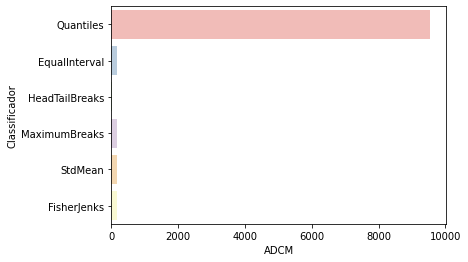

In [ ]:
#VISUALIZAÇÃO PARA ESCOLHER O MELHOR CLASSIFICADOR

class5 = t1, t2, t3, t4, t5, t6,

fits = np.array([ c.adcm for c in class5])

adcms = pd.DataFrame(fits)

adcms['classificador'] = [c.name for c in class5]

adcms.columns = ['ADCM', 'Classificador']
ax = seaborn.barplot(
    y='Classificador', x='ADCM', data=adcms, palette='Pastel1'
)

In [ ]:
#USANDO O CLASSIFICADOR

scheme =  t6

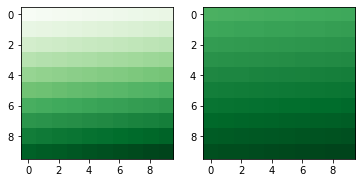

In [ ]:
#PALETA DE CORES

from numpy.core.function_base import linspace
def coresnovas (cmap, minval = 0.0, maxval = 1, n = 1000):
  cor = colors.LinearSegmentedColormap.from_list(
      'trunc({n}, {a:.2f}, {b:.2f})'.format(n = cmap.name, a = minval, b = maxval), 
      cmap(np.linspace(minval, maxval, n )))
  return cor

arr = np.linspace(0, 50, 100).reshape((10,10))
fig, ax = plt.subplots(ncols = 2)

cmap = plt.get_cmap('Greens')
cor = coresnovas(cmap, 0.6,  1)
ax[0].imshow(arr, interpolation = 'nearest', cmap = cmap)
ax[1].imshow(arr, interpolation = 'nearest', cmap = cor)
plt.show()

In [ ]:
#filtra a tabela pelo valor especificado na coluna


#df_tab = tabela['numero']>8

#filtered_df = tabela[df_tab]
#filtered_df

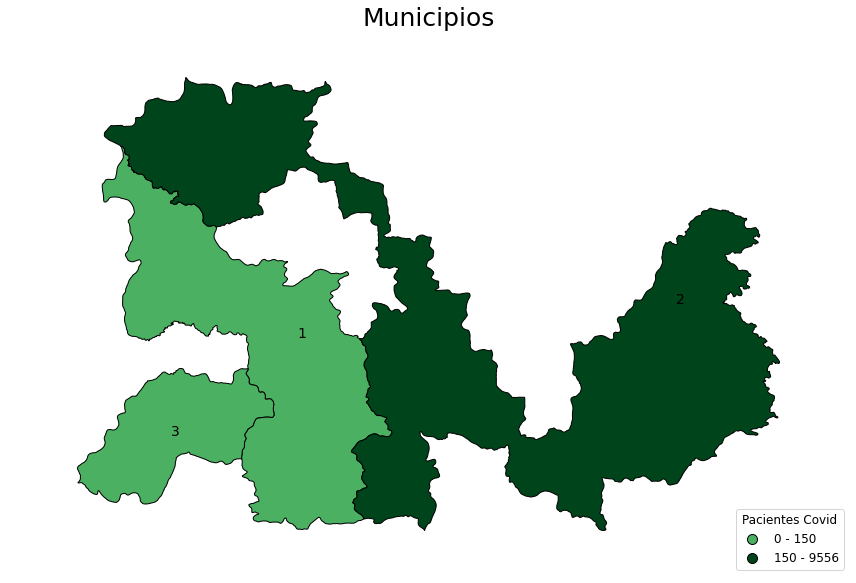

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 10
                                   ))


ax.axis('off')

ax.set_title('Municipios', fontdict={'fontsize': '25', 'fontweight' : '3'})


geoplot.choropleth(nome1, hue = classificador , scheme = scheme, ax = ax, cmap = cor, legend = True, edgecolor = '0',
                    legend_kwargs={"loc":"lower right",
                                  "fontsize": "large",
                                  "title":"Pacientes Covid",
                                  "title_fontsize":"large"},
                  
                   
                   
                  
              
 )
nome1['coords'] = nome1['geometry'].apply(lambda x: x.representative_point().coords[:])
nome1['coords'] = [coords[0] for coords in nome1['coords']]

for idx, row in nome1.iterrows():
    plt.annotate(s=row['Ident'], xy=row['coords'],horizontalalignment='center',fontsize = '14', color = 'Black')